## Import modules

In [1]:
import anndata
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
import numpy.random as random
import pandas as pd
import scanpy as sc
import scvi

Global seed set to 0


In [2]:
import session_info
session_info.show()

In [3]:
sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.settings.set_figure_params(dpi=80, facecolor='white', color_map = 'RdPu',)

## Read in pre-processed anndata

In [4]:
adata = sc.read_h5ad('/nfs/team205/heart/anndata_objects/Foetal/scVI/RNA_foetal_pp.h5ad')
adata

AnnData object with n_obs × n_vars = 372801 × 3343
    obs: 'latent_RT_efficiency', 'latent_cell_probability', 'latent_scale', 'sangerID', 'combinedID', 'donor', 'donor_type', 'region', 'region_finest', 'age', 'gender', 'facility', 'cell_or_nuclei', 'modality', 'kit_10x', 'flushed', 'scrublet_score', 'scrublet_leiden', 'cluster_scrublet_score', 'doublet_pval', 'doublet_bh_pval', 'n_genes', 'n_counts', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'HB_score', 'donor_by_library-prep', 'multiplexed', 'SOC | status', 'SOC | log_prob_singleton', 'SOC | log_prob_doublet', 'batch_key'
    var: 'gene_name_scRNA-0', 'gene_name_multiome-1', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection'
    uns: 'hvg'
    obsm: 'latent_gene_encoding'
    layers: 

In [5]:
print(adata)
print(adata.obs['batch_key'].value_counts())
print(adata.obs['cell_or_nuclei'].value_counts())

AnnData object with n_obs × n_vars = 372801 × 3343
    obs: 'latent_RT_efficiency', 'latent_cell_probability', 'latent_scale', 'sangerID', 'combinedID', 'donor', 'donor_type', 'region', 'region_finest', 'age', 'gender', 'facility', 'cell_or_nuclei', 'modality', 'kit_10x', 'flushed', 'scrublet_score', 'scrublet_leiden', 'cluster_scrublet_score', 'doublet_pval', 'doublet_bh_pval', 'n_genes', 'n_counts', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'HB_score', 'donor_by_library-prep', 'multiplexed', 'SOC | status', 'SOC | log_prob_singleton', 'SOC | log_prob_doublet', 'batch_key'
    var: 'gene_name_scRNA-0', 'gene_name_multiome-1', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection'
    uns: 'hvg'
    obsm: 'latent_gene_encoding'
    layers: 

In [6]:
adata.layers['counts'].data[:10]

array([ 5.,  4., 20.,  1.,  1.,  4.,  4.,  3.,  1.,  2.], dtype=float32)

## Setup anndata for scVI

In [7]:
scvi.model.SCVI.setup_anndata(adata, 
                              layer="counts", 
                              batch_key="batch_key",
                              continuous_covariate_keys=['total_counts','pct_counts_mt','pct_counts_ribo'])

INFO     Using batches from adata.obs["batch_key"]                                           
INFO     No label_key inputted, assuming all cells have same label                           
INFO     Using data from adata.layers["counts"]                                              
INFO     Successfully registered anndata object containing 372801 cells, 3343 vars, 21       
         batches, 1 labels, and 0 proteins. Also registered 0 extra categorical covariates   
         and 3 extra continuous covariates.                                                  
INFO     Please do not further modify adata until model is trained.                          


In [8]:
scvi.data.view_anndata_setup(adata)

/lustre/scratch117/cellgen/team205/kk18/miniconda3/envs/scvi_env/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function view_anndata_setup is deprecated; This method will be removed in 0.15.0. Please avoid building any new dependencies on it.
  warnings.warn(msg, category=FutureWarning)


Anndata setup with scvi-tools version 0.14.5.

              Data Summary               
┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓
┃             Data             ┃ Count  ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩
│            Cells             │ 372801 │
│             Vars             │  3343  │
│            Labels            │   1    │
│           Batches            │   21   │
│           Proteins           │   0    │
│ Extra Categorical Covariates │   0    │
│ Extra Continuous Covariates  │   3    │
└──────────────────────────────┴────────┘

                   SCVI Data Registry                   
┏━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃     Data      ┃         scvi-tools Location          ┃
┡━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│       X       │        adata.layers['counts']        │
│ batch_indices │       adata.obs['_scvi_batch']       │
│    labels     │      adata.obs['_scvi_labels']       │
│   cont_covs   │ adata.obsm['_scvi_extra_continuous'] │
└───────────────┴──────────────────────────────────────┘

                        Label Categories                        
┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┓
┃      Source Location      ┃ Categories ┃ scvi-tools Encoding ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━┩
│ adata.obs['_scvi_labels'] │     0      │          0          │
└───────────────────────────┴────────────┴─────────────────────┘

                             Batch Categories                              
┏━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┓
┃    Source Location     ┃        Categories        ┃ scvi-tools Encoding ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━┩
│ adata.obs['batch_key'] │  BRC2251_Cell_3prime-v3  │          0          │
│                        │  BRC2252_Cell_3prime-v3  │          1          │
│                        │  BRC2256_Cell_3prime-v3  │          2          │
│                        │  BRC2260_Cell_3prime-v3  │          3          │
│                        │  BRC2262_Cell_3prime-v3  │          4          │
│                        │  BRC2263_Cell_3prime-v3  │          5          │
│                        │  C82_Nuclei_Multiome-v1  │          6          │
│                        │  C85_Nuclei_Multiome-v1  │          7          │
│                        │    C86_Cell_5prime-v2    │          8          │
│                        │  C87_Nuclei_Multiome-v1  │          9          │
│                        │  C92_Nuclei_Multiome-v1  │         10          │
│                        │    C94_Cell_5prime-v2    │         11          │
│                        │    C97_Cell_5prime-v2    │         12          │
│                        │  C98_Nuclei_Multiome-v1  │         13          │
│                        │    C99_Cell_5prime-v2    │         14          │
│                        │ C104_Nuclei_Multiome-v1  │         15          │
│                        │ Hst33_Nuclei_Multiome-v1 │         16          │
│                        │ Hst36_Nuclei_Multiome-v1 │         17          │
│                        │ Hst39_Nuclei_Multiome-v1 │         18          │
│                        │ Hst40_Nuclei_Multiome-v1 │         19          │
│                        │ Hst41_Nuclei_Multiome-v1 │         20          │
└────────────────────────┴──────────────────────────┴─────────────────────┘

                 Extra Continuous Variables                  
┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃       Source Location        ┃           Range            ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│  adata.obs['total_counts']   │       1000 -> 727776       │
│  adata.obs['pct_counts_mt']  │ 0 -> 19.991365432739257812 │
│ adata.obs['pct_counts_ribo'] │ 0 -> 19.974821090698242188 │
└──────────────────────────────┴────────────────────────────┘

## Creating and training a model

In [9]:
vae = scvi.model.SCVI(adata, n_hidden = 128, n_latent = 50, n_layers = 3, dispersion = 'gene-batch')
vae

SCVI Model with the following params: 
n_hidden: 128, n_latent: 50, n_layers: 3, dropout_rate: 0.1, dispersion: gene-batch, 
gene_likelihood: zinb, latent_distribution: normal
Training status: Not Trained

To print summary of associated AnnData, use: scvi.data.view_anndata_setup(model.adata)

In [10]:
# train
vae.train()

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Epoch 21/21: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 21/21 [09:38<00:00, 27.55s/it, loss=954, v_num=1]


In [11]:
# save scvi model
vae.save("/nfs/team205/heart/anndata_objects/Foetal/scVI/models/RNA_foetal_global/",overwrite=True)

In [ ]:
# vae = scvi.model.SCVI.load("/nfs/team205/heart/anndata_objects/Foetal/scVI/models/RNA_foetal_global/", adata)

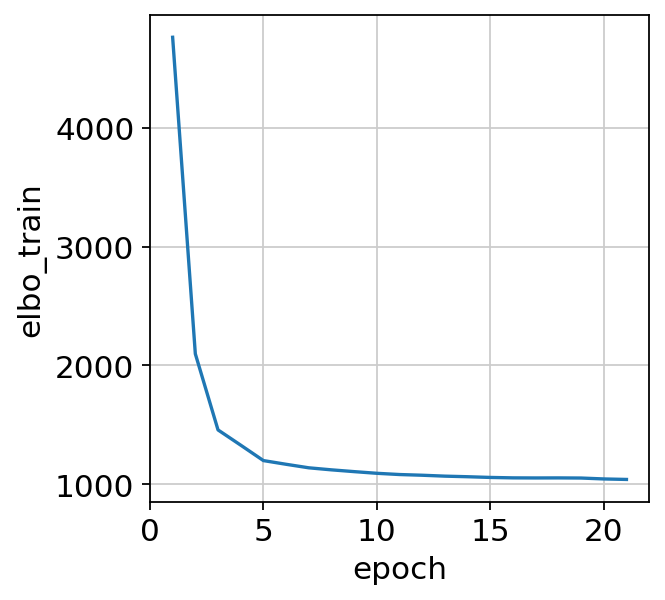

In [12]:
# Convergency plot
vae.history['elbo_train']
x = np.linspace(1, (len(vae.history['elbo_train'])), (len(vae.history['elbo_train'])))
plt.plot(x, vae.history['elbo_train'], label="train")
plt.xlabel('epoch')
plt.ylabel('elbo_train')
plt.show()

## Save post-scVI anndata

In [13]:
adata.obsm["X_scVI"] = vae.get_latent_representation()
adata.write('/nfs/team205/heart/anndata_objects/Foetal/scVI/RNA_foetal_scVI.h5ad')